In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score

# CalHouse
### 1. Get-to-know

In [3]:
# loading data
import pandas as pd
house_data = pd.read_csv('/Users/kaylakim/Documents/TheUnicornTwins/TUT.Projects/ML/Cal-House-Prices/housing.csv')

# printing the first 5 rows
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
house_data.shape

(20640, 10)

In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
house_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
# for i in range(len(house_data.columns)):
#     print(house_data.columns[i])
#     i = house_data[house_data.columns[i]].unique()
#     print(i)
# print('\n')

>remove: 'latitude', 'total_bedrooms', 'population', 'households'

In [9]:
house_data.shape

(20640, 10)

In [10]:
house_data_ = house_data.drop(['longitude', 'latitude'], axis=1)
house_data_

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


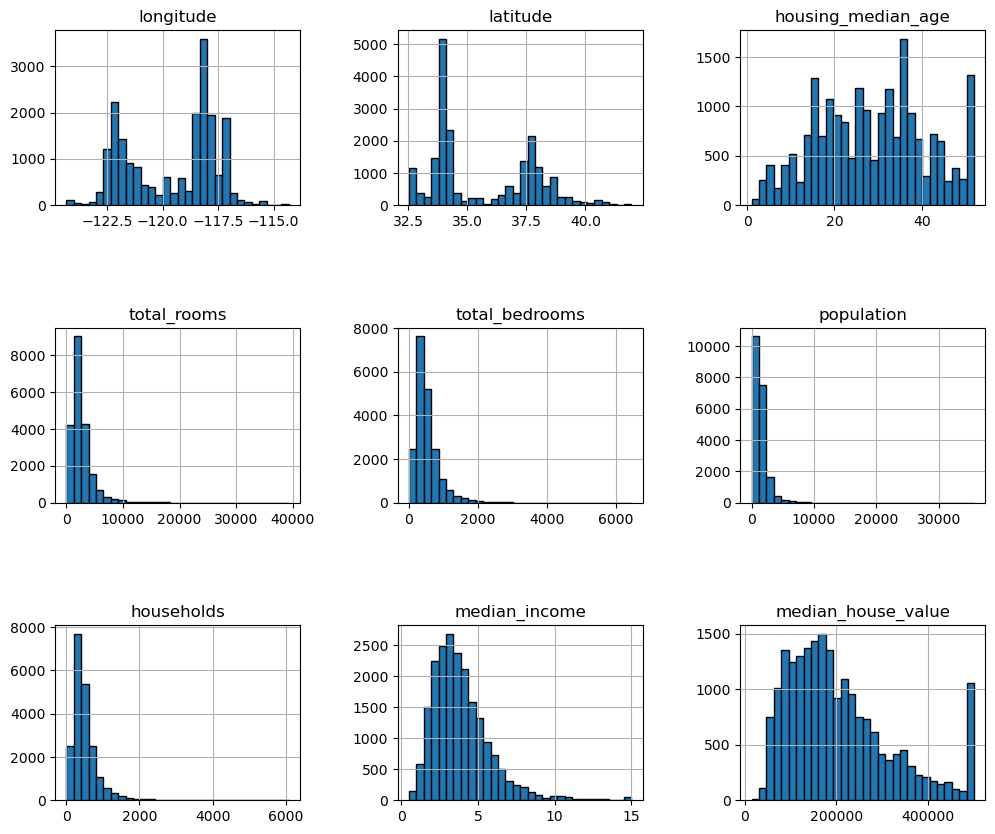

In [11]:
import matplotlib.pyplot as plt

house_data.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

### 2. Clean data
- Our data has not any missing value but we have to deal with outliers.

In [12]:
def outliers_of(data, name_of_col): # data[' ']
    import numpy as np
    Q1 = np.percentile(data[name_of_col], 25)
    Q3 = np.percentile(data[name_of_col], 75)
    
    #Interquartile Range
    IQR = round(Q3 - Q1, 3)
    
    #Number of upper outliers
    num_out_upper = data[data[name_of_col] > (Q3 + 1.5*IQR)].shape[0]
    print(f"The number of upper outliers= {num_out_upper}\n")

    #Number of lower outliers
    num_out_lower = data[data[name_of_col] < (Q1 - 1.5*IQR)].shape[0]
    print(f"The number of lower outliers= {num_out_lower}\n")

    #Percentage of outliers
    outliers_per = (num_out_upper + num_out_lower)/data.shape[0]
    print(f"The percentage of outliers= {round(outliers_per, 3)*100}%")

def remove_upper_outliers(data, name_of_col): # data[' ']
    import numpy as np
    Q1 = np.percentile(data[name_of_col], 25)
    Q3 = np.percentile(data[name_of_col], 75)
    
    #Interquartile Range
    IQR = round(Q3 - Q1, 3)
    
    return data[data[name_of_col] < (Q3 + 1.5*IQR)]

def remove_lower_outliers(data, name_of_col): # data[' ']
    import numpy as np
    Q1 = np.percentile(data[name_of_col], 25)
    Q3 = np.percentile(data[name_of_col], 75)
    
    #Interquartile Range
    IQR = round(Q3 - Q1, 3)
    
    return data[data[name_of_col] > (Q1 - 1.5*IQR)]

- - #### 'total_rooms'

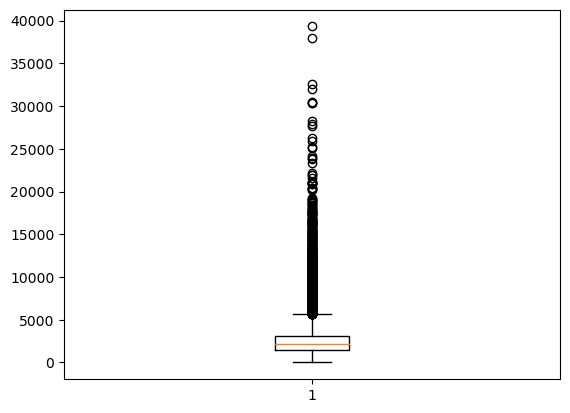

In [13]:
plt.boxplot(house_data_.total_rooms)
plt.show()

In [14]:
outliers_of(house_data_, 'total_rooms')

The number of upper outliers= 1287

The number of lower outliers= 0

The percentage of outliers= 6.2%


In [15]:
house_data_ = remove_upper_outliers(house_data_, 'total_rooms')
house_data_.shape

(19353, 8)

In [16]:
outliers_of(house_data_, 'total_rooms')

The number of upper outliers= 377

The number of lower outliers= 0

The percentage of outliers= 1.9%


- - #### 'median_income'

<AxesSubplot:xlabel='median_income'>

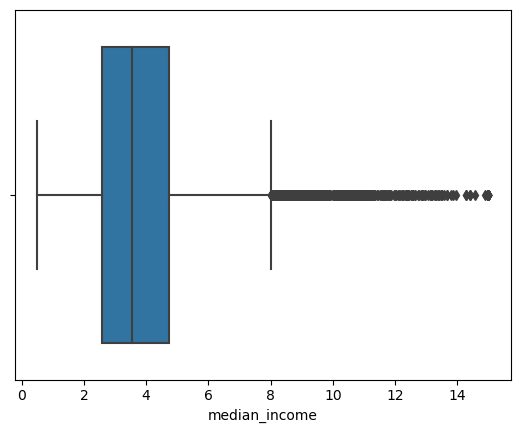

In [17]:
sns.boxplot(house_data.median_income)

In [18]:
outliers_of(house_data_, 'median_income')

The number of upper outliers= 650

The number of lower outliers= 0

The percentage of outliers= 3.4000000000000004%


In [19]:
house_data_ = remove_upper_outliers(house_data_, 'median_income')
house_data_.shape

(18703, 8)

In [20]:
outliers_of(house_data_, 'median_income')

The number of upper outliers= 152

The number of lower outliers= 0

The percentage of outliers= 0.8%


In [21]:
def transform_categ_var(x, lst):
    for i in enumerate(lst):
        if x == i[1]:
            x = i[0]
    return x

In [22]:
house_data_.ocean_proximity = house_data_.ocean_proximity.map(lambda x: transform_categ_var(x, house_data_.ocean_proximity.unique()))
house_data_

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0
5,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0
6,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0
...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2


In [50]:
house_data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [49]:
house_data_.ocean_proximity.unique()

array([0, 1, 2, 3, 4])

### 3. Refine data
#### Separating the features & Target

In [23]:
house_data_.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value', 'ocean_proximity'],
      dtype='object')

In [24]:
X = house_data_.drop(columns='ocean_proximity', axis=1)
y = house_data_.ocean_proximity

## Data Standardization
### 1. Log Normalization
- If we want to find out whether or not we should use Log Normalization, we should calculate the variance of variables, then compare them.  

In [25]:
X.columns[:-1]

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income'],
      dtype='object')

In [26]:
# for i in X.columns[:-1]:
#     print(f"The variance of '{i}'= \n\t\t\t\t{round(X[i].var(), 3)}")

The variance of 'housing_median_age'= 
				150.022
The variance of 'total_rooms'= 
				1317318.555
The variance of 'total_bedrooms'= 
				65413.963
The variance of 'population'= 
				510419.114
The variance of 'households'= 
				55900.932
The variance of 'median_income'= 
				2.141


In [27]:
# X[['housing_median_age','total_rooms']] = np.log(X[['housing_median_age','total_rooms']])
# for i in X.columns[:-1]:
#     print(f"The variance of '{i}'= \n\t\t\t\t{round(X[i].var(), 3)}")

The variance of 'housing_median_age'= 
				0.276
The variance of 'total_rooms'= 
				0.451
The variance of 'total_bedrooms'= 
				65413.963
The variance of 'population'= 
				510419.114
The variance of 'households'= 
				55900.932
The variance of 'median_income'= 
				2.141


### 2. Feature Scaling
- applied for K-Means, K-Nearest-Neighbor, PCA, Gradient Descent
- not used for Naive Bayes, Linear Discriminant Analysis, Tree-Based models

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)

In [32]:
df = pd.DataFrame(X_transformed, columns=X.columns)
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.291388,-0.359528,-1.085147,-1.060742,-1.098874,2.501467,1.467115
1,1.291388,-0.569584,-0.909197,-0.973958,-0.921230,1.398163,1.365473
2,1.291388,-0.205374,-0.733247,-0.964159,-0.752045,0.170059,1.373944
3,1.291388,-1.055986,-0.995217,-1.176920,-1.031200,0.300326,0.691629
4,1.291388,0.454997,0.083942,-0.223696,0.326510,0.042185,0.969260


<AxesSubplot:title={'center':'After Scaling'}, xlabel='housing_median_age', ylabel='Density'>

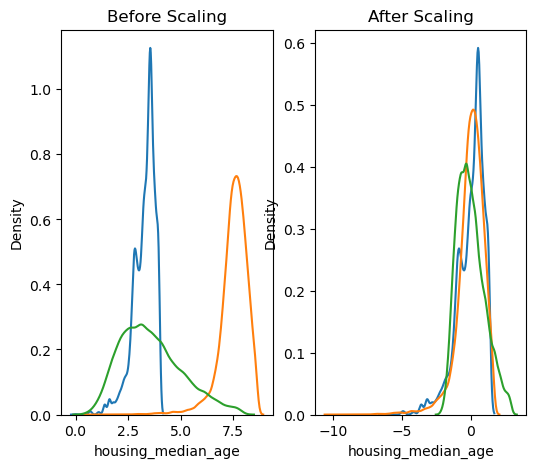

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
#sns.kdeplot(X.longitude, ax=ax1)
sns.kdeplot(X.housing_median_age, ax=ax1)
sns.kdeplot(X.total_rooms, ax=ax1)
sns.kdeplot(X.median_income, ax=ax1)

ax2.set_title('After Scaling')
#sns.kdeplot(df.longitude, ax=ax2)
sns.kdeplot(df.housing_median_age, ax=ax2)
sns.kdeplot(df.total_rooms, ax=ax2)
sns.kdeplot(df.median_income, ax=ax2)

## Model Training
#### Splitting the data to training data & valid data

In [34]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=2)

### 1. Create model


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score

In [36]:
# models = [LogisticRegression(solver='liblinear'),
#           GaussianNB(),
#           KNeighborsClassifier(),
#           DecisionTreeClassifier(criterion='entropy'),
#           RandomForestClassifier(n_estimators=200),
#           SVC(kernel='linear')]

In [37]:
# CV = 5
# cv_df = pd.DataFrame(index=range(CV * len(models)))
# entries = []
# i = 0
# for model in models:
#     model_name = model.__class__.__name__
#     accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
#     print(accuracies)
#     entries.append([model_name, accuracies.mean()])
#     i += 1
# cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])

In [38]:
# cv_df

In [39]:
# plt.figure(figsize=(8, 6))
# plt.bar(cv_df['model_name'], cv_df['accuracy'], color='orange')
# plt.xlabel('model_name')
# plt.ylabel('Mean of accuracies')
# plt.xticks(rotation='vertical')
# plt.title('Accuracies of Algorithms')

In [40]:
from xgboost import XGBClassifier
model = XGBClassifier()
#model = MultinomialNB()
#model = DecisionTreeClassifier()
#model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

### 2. Validate model

In [41]:
print(mean_absolute_error(y_valid, y_pred))

0.45549318364073776


### 3. Evaluate model
#### Accuracy Score

In [42]:
print(f'Accuracy score of valid data= {accuracy_score(y_valid, y_pred)}')
y_train_pred = model.predict(X_train)
print(f'Accuracy score of training data= {accuracy_score(y_train, y_train_pred)}')

Accuracy score of valid data= 0.686180165731088
Accuracy score of training data= 0.8540302098649913


In [43]:
print(f'The valid score of valid data= {model.score(X_valid, y_valid)*100}%')
print(f'The train score of training data= {model.score(X_train, y_train)*100}%')

The valid score of valid data= 68.6180165731088%
The train score of training data= 85.40302098649913%


#### Performance Metric

In [44]:
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[ 120  235   41   25    0]
 [  59 1353  120   43    0]
 [  20  171 1043   21    0]
 [  28  318   91   51    0]
 [   0    1    0    1    0]]
              precision    recall  f1-score   support

           0       0.53      0.29      0.37       421
           1       0.65      0.86      0.74      1575
           2       0.81      0.83      0.82      1255
           3       0.36      0.10      0.16       488
           4       0.00      0.00      0.00         2

    accuracy                           0.69      3741
   macro avg       0.47      0.42      0.42      3741
weighted avg       0.65      0.69      0.65      3741



#### Precision and Recall

In [46]:
# print(f'Precision= {precision_score(y_valid, y_pred)}')
# print(f'Recall= {recall_score(y_valid, y_pred)}')

In [47]:
input_data = (50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0) #NEAR BAY

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)


In [51]:
house_data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [48]:
prediction = model.predict(scaler.transform(input_data_reshaped))
print(prediction)

[2]
The Person has Heart Disease.


In [55]:
for i in enumerate(house_data.ocean_proximity.unique()):
    #print(i)
    if (prediction[0] == i[0]):
        print(f'Your house is {i[1]}.')

Your house is INLAND.
